## Определение перспективного тарифа для телеком компании

__Описание тарифов__ 

___Тариф «Смарт»___
- Ежемесячная плата: 550 рублей  
- Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика  
- Стоимость услуг сверх тарифного пакета:  
    * минута разговора: 3 рубля 
    * сообщение: 3 рубля
    * 1 Гб интернет-трафика: 200 рублей.  

___Тариф «Ультра»___
- Ежемесячная плата: 1950 рублей  
- Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика  
- Стоимость услуг сверх тарифного пакета: 
    * минута разговора: 1 рубль
    * сообщение: 1 рубль
    * 1 Гб интернет-трафика: 150 рублей.    

«Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута.  
Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта.  

__Поставленная задача__
- Необходимо для каждого пользователя посчитать:
    * количество сделанных звонков и израсходованных минут разговора по месяцам;
    * количество отправленных сообщений по месяцам;
    * объем израсходованного интернет-трафика по месяцам;
    * помесячную выручку с каждого пользователя.
- Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц?
- Посчитать по вышеуказанным данным среднее количество, дисперсию и стандартное отклонение.
- Построить гистограммы и описать распределение.
- Проверить гипотезы:
    * средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
    * средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

__Описание данных__

___Таблица users (информация о пользователях):___
user_id — уникальный идентификатор пользователя  
first_name — имя пользователя  
last_name — фамилия пользователя  
age — возраст пользователя (годы)  
reg_date — дата подключения тарифа (день, месяц, год)  
churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)  
city — город проживания пользователя  
tarif — название тарифного плана  

___Таблица calls (информация о звонках):___
id — уникальный номер звонка  
call_date — дата звонка  
duration — длительность звонка в минутах  
user_id — идентификатор пользователя, сделавшего звонок  

___Таблица messages (информация о сообщениях):___
id — уникальный номер сообщения  
message_date — дата сообщения  
user_id — идентификатор пользователя, отправившего сообщение  

___Таблица internet (информация об интернет-сессиях):___
id — уникальный номер сессии  
mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)  
session_date — дата интернет-сессии  
user_id — идентификатор пользователя  

___Таблица tariffs (информация о тарифах):___
tariff_name — название тарифа  
rub_monthly_fee — ежемесячная абонентская плата в рублях  
minutes_included — количество минут разговора в месяц, включённых в абонентскую плату  
messages_included — количество сообщений в месяц, включённых в абонентскую плату  
mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)  
rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)  
rub_per_message — стоимость отправки сообщения сверх тарифного пакета  
rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)  

## Открываем данные и изучаем общую информацию

### Открываем данные

In [192]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

In [193]:
try:
    df_calls=pd.read_csv('/datasets/calls.csv') 
    df_internet=pd.read_csv('/datasets/internet.csv')
    df_messages=pd.read_csv('/datasets/messages.csv')
    df_tariffs=pd.read_csv('/datasets/tariffs.csv')
    df_users=pd.read_csv('/datasets/users.csv')
    display("Все данные загружены")
except:
    display('Ошибка при чтении файла') 

'Все данные загружены'

### Изучаем общую информацию

In [194]:
display('calls', df_calls.sample(2))
display('internet', df_internet.sample(2))
display('messages', df_messages.sample(2))
display('tariffs', df_tariffs)
display('users', df_users.sample(2))

'calls'

,id,call_date,duration,user_id
114063,1291_689,2018-09-13,13.17,1291
200593,1494_255,2018-12-14,5.84,1494


'internet'

,Unnamed: 0,id,mb_used,session_date,user_id
33560,33560,1118_177,441.02,2018-11-09,1118
6457,6457,1021_101,858.50,2018-06-20,1021


'messages'

,id,message_date,user_id
34988,1150_168,2018-09-13,1150
65450,1281_337,2018-06-15,1281


'tariffs'

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


'users'

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
145,1145,45,NaN,Тюмень,Юлий,Алешин,2018-04-11,smart
480,1480,29,2018-09-26,Новокузнецк,Гелена,Емельянова,2018-02-14,smart


In [195]:
# смотрим типы и общее количество данных
display('calls')
display(df_calls.info())
display('internet')
display(df_internet.info())
display('messages')
display(df_messages.info())
display('tariffs')
display(df_tariffs.info())
display('users')
display(df_users.info())

'calls'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


None

'internet'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


None

'messages'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


None

'tariffs'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


None

'users'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


None

### Выводы

исходя из полученных данных, определим, какие данные привести к нужным типам и какие ошибки нужно исправить  

<code> DF       | Столбец        | Замена на тип         | Пропуски   | Примечание    
:--------- |:-------------:| :-------------:| :-------------:| -------------:
calls      | duration      | int8           | 0              | округлить до целых 
calls      | user_id       | int16          | 0              | 
           |               |                |                |
internet   | Unnamed: 0    | не требуется   | удалить        | дублирует индекс 
internet   | mb_used       | int16          | 0              | округлить до целых
internet   | user_id       | int16          | 0              |   
           |               |                |                |    
messages   | user_id       | int16          | 0              |
           |               |                |                |    
tariffs    | messages_included      | int16          | 0              | небольшой объем данных
tariffs    | mb_per_month_included  | int16          | 0              | небольшой объем данных
tariffs    | minutes_included       | int16          | 0              | небольшой объем данных
tariffs    | rub_monthly_fee        | int16          | 0              | небольшой объем данных
tariffs    | rub_per_gb             | int16          | 0              | небольшой объем данных
tariffs    | rub_per_message        | int8           | 0              | небольшой объем данных
tariffs    | rub_per_minute         | int8           | 0              | небольшой объем данных
           |               |                |                |    
users      | user_id	   | int16          | 0              | небольшой объем данных
users      | age           | int8           | 0              | небольшой объем данных
users      | churn_date    | не требуется   | 462            | NaN

</code>

В столбце calls['duration'] имеются данные равные 0. Это не является ошибкой. Это пропущенные звонки.  
В столбце internet['mb_used'] имеются данные равные 0. Это не является ошибкой. Пользователь просто не пользовался интернетом.  
В столбце users['churn_date'] имеются пропуски. Это означает что тариф действовал на моент выгрузки данных.  
Колонки с датами не трогаем, оставляем их в формате год-месяц-день.  
В df tariffs и users пренебрежем заменой типов данных, так как объем этих df не превышает 32KB

## Подготовка данных

In [196]:
#заменим NaN на 'действует'
df_users['churn_date']=df_users['churn_date'].fillna('действует')

In [197]:
# удаляем столбец df_internet['Unnamed: 0']
df_internet = df_internet.drop('Unnamed: 0', 1)

In [198]:
# округляем до целых значений
# по правилам компании длительность разговоров каждой сессии всегда округляется вверх
#df_calls['duration']=df_calls['duration'].apply(np.ceil)
#df_internet['mb_used']=df_internet['mb_used'].round()

In [199]:
# мяняем типы данных
df_calls['duration']=df_calls['duration'].astype('int8') 
df_calls['user_id']=df_calls['user_id'].astype('int16')
#df_internet['mb_used']=df_internet['mb_used'].astype('int16')
df_internet['user_id']=df_internet['user_id'].astype('int16')
df_messages['user_id']=df_messages['user_id'].astype('int16')

In [200]:
# Код ревьюера

s1 = pd.Series([1,2,3,4,5,55],dtype='int8')

s1 * 3

0     3
1     6
2     9
3    12
4    15
5   -91
dtype: int8

### Вывод
- заменили NaN на другие значения
- удалили дублирующиеся столбцы
- по правилам компании длительность разговоров каждой сессии всегда округляется вверх - скорректировали данные
- преобразовали тип данных в столбцах. Это позволило сократить размер предоставленных данных с 14.7 до 8.6Mb. Экономия ресурсов составила более 41%

## Расчет значений для каждого пользователя

### Количество сделанных звонков и израсходованных минут разговора по месяцам

In [201]:
# добавим столбец "месяц"
df_calls['mounth'] = pd.DatetimeIndex(df_calls['call_date']).month

# считаем среднюю продолжительность звонка по каждому пользователю за каждый месяц
user_calls_month_lenght=df_calls.pivot_table(index=['user_id', 'mounth'], values=['duration'], aggfunc=np.sum)

# считаем количество звонков по каждому пользователю за каждый месяц
df_calls['user_id_copy']=df_calls['user_id']
user_calls_month_sum=df_calls.pivot_table(index=['user_id', 'mounth'], values=["user_id_copy"], aggfunc=[len])
user_calls_month_sum.columns = ['calls_sum']

# объеденим в общую таблицу
user_calls_month=user_calls_month_lenght.join(user_calls_month_sum)

### Количество отправленных сообщений по месяцам

In [202]:
# добавим столбец "месяц"
df_messages['mounth'] = pd.DatetimeIndex(df_messages['message_date']).month

# считаем количество sms по каждому пользователю за каждый месяц
df_messages['user_id_copy']=df_messages['user_id']
user_messages_month=df_messages.pivot_table(index=['user_id', 'mounth'], values=["user_id_copy"], aggfunc=[len])
user_messages_month.columns = ['messages_sum']

# объеденим данные
stat=user_calls_month.join(user_messages_month, how='outer')

### Объем израсходованного интернет-трафика по месяцам

In [203]:
# добавим столбец "месяц"
df_internet['mounth'] = pd.DatetimeIndex(df_internet['session_date']).month

# считаем количество интернет-трафика по каждому пользователю за каждый месяц
#df_internet['user_id_copy']=df_internet['user_id']
user_internet_month=df_internet.pivot_table(index=['user_id', 'mounth'], values=["mb_used"], aggfunc=[np.sum])
user_internet_month.columns = ['internet_sum']

# объеденим данные
stat=stat.join(user_internet_month, how='outer')

### Чистим получившиеся данные

In [204]:
# добавляем индекс тарифа: smart=0, ultra=1
df_users['id_tariff']=df_users['tariff']
df_users['id_tariff'] = df_users['id_tariff'].replace('smart', 0)
df_users['id_tariff'] = df_users['id_tariff'].replace('ultra', 1)

# сбрасываем индесы, для получения df
stat = stat.reset_index()

# объеденяем df
stat=stat.merge(df_users[['user_id', 'id_tariff']]) 
stat=stat.merge(df_users[['user_id', 'city']]) #добавляем для дальнейшей проверки гипотез

# переведем трафик в Gb
stat['internet_gb'] = stat['internet_sum']/1024
    
# для трафика отдельные сесси не считаются 
# общая сумма трафика за месяц оклугляется в большую сторону
stat['internet_gb']=stat['internet_gb'].apply(np.ceil)

# убераем NaN из полученных данныx
# NaN появились из-за отсутствия данных в разных базах 
# можно сделать вывод что данными услугами не пользовались, поэтому они и отсутствуют, заменим на 0
stat['messages_sum']=stat['messages_sum'].fillna(0)
stat['duration']=stat['duration'].fillna(0)
stat['calls_sum']=stat['calls_sum'].fillna(0)
stat['internet_sum']=stat['internet_sum'].fillna(0)
stat['internet_gb']=stat['internet_gb'].fillna(0)


### Помесячная выручка с каждого пользователя

помесячную выручку будем считать по формуле: ((sum кол-во звонков - бесплатный лимит) + (sum кол-во сообщений - бесплатный лимит) + (sum кол-во трафика - sum бесплатный лимит)) * тарифный план + абонетская плата

In [205]:
# sum кол-во звонков - бесплатный лимит
# лимит: Смарт = 500 мин, Ультра = 3000 мин
# окрлугление секунд до минут в кажой сессии

# функция для подсчета значений 
def sum_limit(x):
    duration = x['duration']
    id_t = x['id_tariff']
    if id_t == 0:
#        if (duration - 500) > 0:
#            return duration - 500
        if (duration - df_tariffs.loc[0,'minutes_included']) > 0:
            return duration - df_tariffs.loc[0,'minutes_included']
        return 0
    if id_t == 1:
#        if (duration - 3000) > 0:
#            return duration - 3000
        if (duration - df_tariffs.loc[1,'minutes_included']) > 0:
            return duration - df_tariffs.loc[1,'minutes_included']
        return 0
    return 'Error'
 
stat['calls_limit']=stat.apply(sum_limit, axis=1)   # считаем значения 

In [206]:
# sum кол-во сообщений - бесплатный лимит
# лимит: Смарт = 50 sms, Ультра = 1000 sms

# функция для подсчета значений
def sum_limit(x):
    message = x['messages_sum']
    id_t = x['id_tariff']
    if id_t == 0:
        if (message - 50) >0:
            return message - 50
        return 0
    if id_t == 1:
        if (message - 1000) >0:
            return message - 1000
        return 0
    return 'Error'
 
stat['message_limit']=stat.apply(sum_limit, axis=1)   # считаем значения 

In [207]:
# sum кол-во трафика - sum бесплатный лимит
# лимит: Смарт = 15 Gb, Ультра = 30 Gb
# для трафика отдельные сесси не считаются 
# общая сумма трафика за месяц оклугляется в большую сторону

# функция для подсчета значений
def sum_limit(x):
    internet = x['internet_gb']
    id_t = x['id_tariff']
    if id_t == 0:
        if (internet - 15) >0:
            return internet - 15
        return 0
    if id_t == 1:
        if (internet - 30) >0:
            return internet - 30
        return 0
    return 'Error'
 
stat['internet_limit']=stat.apply(sum_limit, axis=1)   # считаем значения 

In [208]:
# считаем помесячную выручку с каждого пользователя
# превышение лимита оплачивается: 
# Смарт - звонки 3руб/мин, sms 3руб/мин, трафик 200руб/gb, абон.плата = 200
# Ультра - звонки 1руб/мин, sms 1руб/мин, трафик 200руб/gb, абон.плата = 150

def revenu(x):
    duration = x['calls_limit']
    message = x['message_limit']    
    internet = x['internet_limit']
    id_t = x['id_tariff']
    if id_t == 0: 
        return duration*3+message*3+internet*200+550
    return duration*1+message*1+internet*150+1950

stat['revenu']=stat.apply(revenu, axis=1) 
stat['revenu']=stat['revenu'].round(2) #округляем до целых копеек

stat.sample(2)

,user_id,mounth,duration,calls_sum,messages_sum,internet_sum,id_tariff,city,internet_gb,calls_limit,message_limit,internet_limit,revenu
1026,1161,9,345.0,53.0,44.0,17334.06,0,Набережные Челны,17.0,0.0,0.0,2.0,950.0
386,1061,9,500.0,77.0,8.0,18582.97,0,Санкт-Петербург,19.0,0.0,0.0,4.0,1350.0


### Выводы
- сгруппировали данные по ежемесячному количеству звонков, sms и интернет-трафика по каждому клиенту
- для интернет-трафика отдельные сесси не считаются, общая сумма трафика в Gb за месяц оклугляется в большую сторону. Привели к нужному виду
- в связи с разницей в данных, в итоговой таблице появились NaN. Можно сделать предположение, что эти данные отстутствуют по причине того, что пользователи не пользовались какой-либо услугой за предоставленный месяц. Заменили на 0 (не пользовались)
- посчитали помесячную выручку по каждому пользователю
- для получения более релевантных данных необходимо разделить пользователей различных тарифов и провести анализ по каждой группе

## Разница в предпочтениях пользователей разных тарифов.

### Разделение по тарифам

In [209]:
#создадим две таблицы по тарифам
smart = stat[stat['id_tariff'] == 0]
ultra = stat[stat['id_tariff'] == 1]

In [210]:
smart.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,2229.0,1246.506505,146.119496,1001.0,1121.00,1239.00,1376.00,1499.00
mounth,2229.0,8.346792,2.920316,1.0,6.00,9.00,11.00,12.00
duration,2229.0,371.444145,169.885089,0.0,251.00,375.00,485.00,1275.00
calls_sum,2229.0,58.463437,25.939858,0.0,40.00,60.00,76.00,198.00
messages_sum,2229.0,33.384029,28.227876,0.0,10.00,28.00,51.00,143.00
internet_sum,2229.0,16208.386990,5870.476681,0.0,12643.01,16506.84,20042.93,38552.45
id_tariff,2229.0,0.000000,0.000000,0.0,0.00,0.00,0.00,0.00
internet_gb,2229.0,16.328847,5.747061,0.0,13.00,17.00,20.00,38.00
calls_limit,2229.0,21.788694,58.832963,0.0,0.00,0.00,0.00,775.00
message_limit,2229.0,5.799910,13.442456,0.0,0.00,0.00,1.00,93.00


In [211]:
ultra.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,985.0,1263.094416,140.694908,1000.0,1143.00,1277.00,1381.00,1495.00
mounth,985.0,8.250761,2.871762,1.0,6.00,9.00,11.00,12.00
duration,985.0,467.923858,282.660479,0.0,253.00,458.00,670.00,1484.00
calls_sum,985.0,73.392893,43.916853,0.0,41.00,74.00,104.00,244.00
messages_sum,985.0,49.363452,47.804457,0.0,6.00,38.00,79.00,224.00
internet_sum,985.0,19468.805208,10087.170752,0.0,11770.26,19308.01,26837.69,49745.69
id_tariff,985.0,1.000000,0.000000,1.0,1.00,1.00,1.00,1.00
internet_gb,985.0,19.494416,9.853511,0.0,12.00,19.00,27.00,49.00
calls_limit,985.0,0.000000,0.000000,0.0,0.00,0.00,0.00,0.00
message_limit,985.0,0.000000,0.000000,0.0,0.00,0.00,0.00,0.00


### Вывод по средним значениям

__Смарт, в среднем за месяц:__

In [212]:
print('Минут разговора:', smart['duration'].describe()['mean'])
print('Количество звонков:', smart['calls_sum'].describe()['mean'])
print('SMS:', smart['messages_sum'].describe()['mean'])
print('Интернет-трафика (Gb):', smart['internet_gb'].describe()['mean'])
print('Оплата:', smart['revenu'].describe()['mean'])
print('')
print('Стандартное отклонение минут разговора:', smart['duration'].describe()['std'])
print('Стандартное отклонение количества звонков:', smart['calls_sum'].describe()['std'])
print('Стандартное отклонение SMS:', smart['messages_sum'].describe()['std'])
print('Стандартное отклонение интернет-трафика:', smart['internet_gb'].describe()['std'])
print('Стандартное отклонение оплаты:', smart['revenu'].describe()['std'])
print('')
print('Дисперсия минут разговора:', smart['duration'].describe()['std'] ** 2)
print('Дисперсия количества звонков:', smart['calls_sum'].describe()['std'] ** 2)
print('Дисперсия SMS:', smart['messages_sum'].describe()['std'] ** 2)
print('Дисперсия интернет-трафика:', smart['internet_gb'].describe()['std'] ** 2)
print('Дисперсия оплаты:', smart['revenu'].describe()['std'] ** 2)

Минут разговора: 371.4441453566622
Количество звонков: 58.46343651861822
SMS: 33.384028712427096
Интернет-трафика (Gb): 16.328847016599372
Оплата: 1230.5226558995066

Стандартное отклонение минут разговора: 169.88508933963502
Стандартное отклонение количества звонков: 25.939858197409944
Стандартное отклонение SMS: 28.22787555676141
Стандартное отклонение интернет-трафика: 5.7470605685090534
Стандартное отклонение оплаты: 785.4897996547785

Дисперсия минут разговора: 28860.94357993577
Дисперсия количества звонков: 672.8762433017358
Дисперсия SMS: 796.8129584480083
Дисперсия интернет-трафика: 33.02870517811161
Дисперсия оплаты: 616994.225361704


__Ультра, в среднем за месяц:__

In [213]:
print('Минут разговора:', ultra['duration'].describe()['mean'])
print('Количество звонков:', ultra['calls_sum'].describe()['mean'])
print('SMS:', ultra['messages_sum'].describe()['mean'])
print('Интернет-трафика (Gb):', ultra['internet_gb'].describe()['mean'])
print('Оплата:', ultra['revenu'].describe()['mean'])
print('')
print('Стандартное отклонение минут разговора:', ultra['duration'].describe()['std'])
print('Стандартное отклонение количества звонков:', ultra['calls_sum'].describe()['std'])
print('Стандартное отклонение SMS:', ultra['messages_sum'].describe()['std'])
print('Стандартное отклонение интернет-трафика:', ultra['internet_gb'].describe()['std'])
print('Стандартное отклонение оплаты:', ultra['revenu'].describe()['std'])
print('')
print('Дисперсия минут разговора:', ultra['duration'].describe()['std'] ** 2)
print('Дисперсия количества звонков:', ultra['calls_sum'].describe()['std'] ** 2)
print('Дисперсия SMS:', ultra['messages_sum'].describe()['std'] ** 2)
print('Дисперсия интернет-трафика:', ultra['internet_gb'].describe()['std'] ** 2)
print('Дисперсия оплаты:', ultra['revenu'].describe()['std'] ** 2)

Минут разговора: 467.9238578680203
Количество звонков: 73.39289340101523
SMS: 49.36345177664975
Интернет-трафика (Gb): 19.494416243654822
Оплата: 2070.1522842639592

Стандартное отклонение минут разговора: 282.66047907738397
Стандартное отклонение количества звонков: 43.91685314426948
Стандартное отклонение SMS: 47.80445735017472
Стандартное отклонение интернет-трафика: 9.853511367510293
Стандартное отклонение оплаты: 376.1871144505328

Дисперсия минут разговора: 79896.94643225623
Дисперсия количества звонков: 1928.6899900953322
Дисперсия SMS: 2285.266142544674
Дисперсия интернет-трафика: 97.09168626965457
Дисперсия оплаты: 141516.7450786183


- в среднем на обоих тарифах лимит не превышен исходя из средней продолжительности разговора
- на тарифе Ультра в среднем длительность разговора превышает длительность на Смарт на 21%, при этом лимит разговоров выбран чуть более чем на 1/6
- на тарифе Ультра в среднем количество звонков выше на 20%, из чего можно сделать вывод, что на обоих тарифах средняя продолжительность разговора примерно одинакова
- в среднем, исходя из кол-ва отправленных SMS, на обоих тарифах лимит не превышен. В среднем на тарифе Ультра SMS отправляют чаще на 32%
- интернет-трафика в на тарифе Смарт явно не хватает - он превышен более чем у 50% пользователей. На тарифе Ультра интернетом пользуются в среднем на 16% больше
- средняя оплата на тарифе Смарт значительно превышает минимальную оплату (на 134%), медиана больше почти в 2 раза. 
- на обоих тарифах наблюдаентся очень большой разброс по стандартному отклонению (разброс до 1100%), кроме интернет-трафика (разброс от 5,7 до 9,9%%). Это может говорить о большом количестве выбросов в показателях
- уже из полученных данных видно, что необходим 3-ий тариф с более высокой оплатой чем Смарт и с увеличенным количеством интернета, SMS и длительности звонков. Из медианы по этим показателям видно, что потенциальных клиентов для перехода со Смарта на 3-ий тариф более 50%

### Распределение показателей

#### Продолжительность звонков

Text(0, 0.5, 'Количество пользователей')

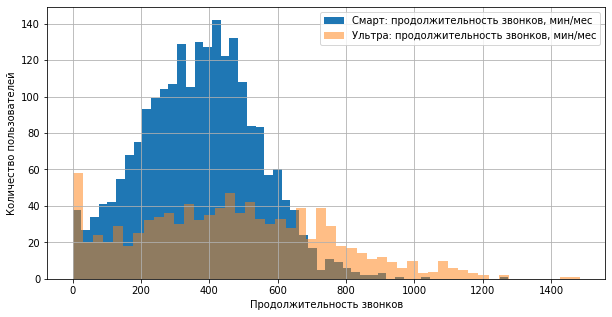

In [214]:
#Смарт
smart['duration'].plot(kind='hist', label='Смарт: продолжительность звонков, мин/мес',
                       legend=True, bins=50)

#Ультра
ultra['duration'].plot(kind='hist', label='Ультра: продолжительность звонков, мин/мес',
                       legend=True, grid=True, bins=50, figsize=(10,5), alpha=0.5)

plt.xlabel('Продолжительность звонков')
plt.ylabel('Количество пользователей') 

#### Количество звонков

Text(0, 0.5, 'Количество пользователей')

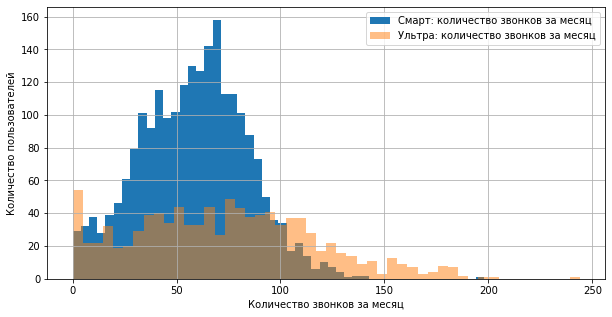

In [215]:
#Смарт
smart['calls_sum'].plot(kind='hist', label='Смарт: количество звонков за месяц',
                       legend=True, grid=True, bins=50, figsize=(10,5))

#Ультра
ultra['calls_sum'].plot(kind='hist', label='Ультра: количество звонков за месяц',
                       legend=True, grid=True, bins=50, figsize=(10,5), alpha=0.5)

plt.xlabel('Количество звонков за месяц')
plt.ylabel('Количество пользователей') 

#### Количество SMS

Text(0, 0.5, 'Количество пользователей')

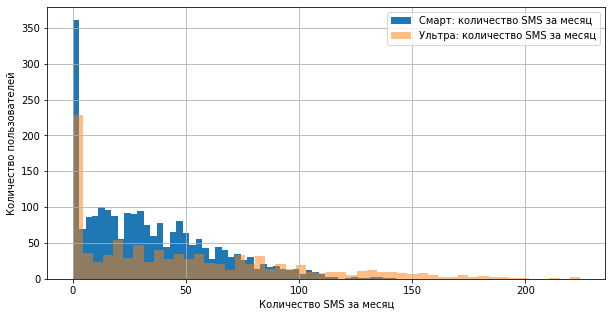

In [216]:
#Смарт
smart['messages_sum'].plot(kind='hist', label='Смарт: количество SMS за месяц',
                       legend=True, bins=50)

#Ультра
ultra['messages_sum'].plot(kind='hist', label='Ультра: количество SMS за месяц',
                       legend=True, grid=True, bins=50, figsize=(10,5), alpha=0.5)

plt.xlabel('Количество SMS за месяц')
plt.ylabel('Количество пользователей') 

#### Количество интернет-трафика

Text(0, 0.5, 'Количество пользователей')

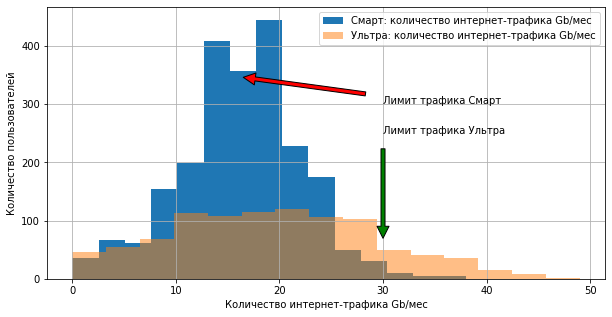

In [217]:
#Смарт
i=smart['internet_gb'].plot(kind='hist', label='Смарт: количество интернет-трафика Gb/мес',
                       legend=True, bins=15)
i.annotate('Лимит трафика Смарт', xy=(15, 350), xytext=(30, 300),
            arrowprops={'facecolor': 'red', 'shrink': 0.1})


#Ультра
n=ultra['internet_gb'].plot(kind='hist', label='Ультра: количество интернет-трафика Gb/мес',
                       legend=True, grid=True, bins=15, figsize=(10,5), alpha=0.5)
n.annotate('Лимит трафика Ультра', xy=(30, 50), xytext=(30, 250),
            arrowprops={'facecolor': 'green', 'shrink': 0.1})

plt.xlabel('Количество интернет-трафика Gb/мес')
plt.ylabel('Количество пользователей') 

#### Оплата за месяц

Text(0, 0.5, 'Количество пользователей')

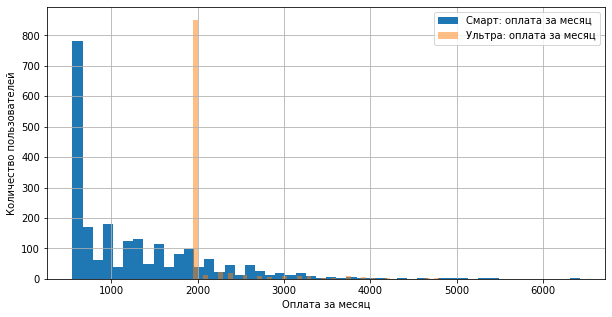

In [218]:
#Смарт
smart['revenu'].plot(kind='hist', label='Смарт: оплата за месяц',
                       legend=True, bins=50)

#Ультра
ultra['revenu'].plot(kind='hist', label='Ультра: оплата за месяц',
                       legend=True, grid=True, bins=50, figsize=(10,5), alpha=0.5)

plt.xlabel('Оплата за месяц')
plt.ylabel('Количество пользователей') 

### Вывод по распределениям
- продолжительность звонков:
    - Смарт: нормальное распределение
    - Ультра: распределаение Пуасона
- количество звонков:
    - Смарт: нормальное распределение
    - Ультра: распределаение Пуасона
- количество SMS:
    - Смарт: распределаение Пуасона
    - Ультра: распределаение Пуасона
- количество интернет-трафика:
    - Смарт: нормальное распределение
    - Ультра: нормальное распределение
- оплата за месяц:
    - Смарт: распределаение Пуасона
    - Ультра: распределаение Пуасона

### Общий вывод по предпочтениям пользователей разных тарифов
- не укладываюься в лимит звонков: на тарифе Смарт около 34%, на тарифе Ультра 0%
- на тарифе Ультра в среднем длительность разговора превышает длительность на Смарт на 21%
- средняя продолжительность 1 звонка: Смарт - 7 мин 9 сек, Ультра - 7 мин 11 сек.
- на тарифе Ультра в среднем количество звонков выше на 20%
- не укладываюься в лимит SMS: на тарифе Смарт около 26%, на тарифе Ультра 0%
- в среднем на тарифе Ультра SMS отправляют чаще на 32%
- не укладываюься в лимит инертнет-трафика: на тарифе Смарт около 65%, на тарифе Ультра 15%
- на тарифе Ультра интернетом пользуются в среднем на 16% больше
- не укладываются в абонентскую плату: на тарифе Смарт окло 75%, на тарифе Ультра около 14%
- показатели на тарифе Ультра распределены более сглажено чем на тарифе Смарт. Происходит это по двум причинам:
    - диапазон значений разговоров, SMS и интернета в тарифе Ультра больше чем в Смарт
    - выборка по количеству пользователей на тарифе Смарт превышает аналогичную выборку по тарифу Ультра более чем в 2 раза
- выборка на тарифе Смарт состоит из 350 уникальных пользователей, в среднем каждый пользовался тарифом 6.4 месяца в заданный период
- выборка на тарифе Ультра состоит из 148 уникальных пользователей, в среднем каждый пользовался тарифом 2.8 месяца в заданный период
- отток клиентов с тарифа Ультра возможен из-за того, что пользователи укладываются в лимиты более дешевого тарифа Смарт - в случае продолжительности звонков в 54% случаев, в случае SMS в 59%, в случае с интернет-трафиком в 36%
- рекомендуется добавить 3-ий тариф с более высокой оплатой чем Смарт и с увеличенным количеством интернета, SMS и длительности звонков. Количество потенциальных клиентов для перехода со Смарта на новый тариф, которые не укладываются в абон.плату хотя бы в один из месяцев более чем на 20%, составляет более 68%.
- уже сейчас можно сделать обзвон клиентов тарифа Смарт, чьи расходы превышают 1950 руб. в месяц, с предложением перейти на тариф Ультра. Таких в выборке почти 19%

## Гипотезы

### Отличие выручки пользвателей разных тарифов

In [219]:
# Нулевая гипотеза - средняя выручка равна.
# Альтернативная гипотеза - средняя выручка пользователей тарифов «Ультра» и «Смарт» различается".
# Использую метод scipy.stats.ttest_ind (проверка равенства 2-х совокупностей)
# Установим equal_var = False, потому что выборки отличаются.
# Критический уровень значимости - 5%.

alpha=0.05
results=st.ttest_ind(smart['revenu'], ultra['revenu'], equal_var=False)
print('P-value:', results.pvalue)

if results.pvalue < alpha:
    display("Отвергаем нулевую гипотезу")
else:
    display("Не получилось отвергнуть нулевую гипотезу")

P-value: 5.5514986360950055e-295


'Отвергаем нулевую гипотезу'

### Отличие выручки пользователей из Москвы от других регионов

In [220]:
# Нулевая гипотеза - средняя выручка пользователей из Москвы равна средней выручке пользователей из других регионов.
# Альтернативная гипотеза - средняя выручка пользователей из Москвы различается со средней региональной выручкой".
# Использую метод scipy.stats.ttest_ind (проверка равенства 2-х совокупностей)
# Установим equal_var = False, потому что выборки отличаются.
# Критический уровень значимости - 5%.

#создаем 2 таблицы, в одной будут все пользователи из москвы, во второй - из регионов
moscow=stat[stat['city'] == 'Москва']
region=stat[stat['city'] != 'Москва']

#соотношениt пользователей разных тарифов в Москве и регионах
moscow_smart=moscow[moscow['id_tariff']==0]
moscow_ultra=moscow[moscow['id_tariff']==1]
region_smart=region[region['id_tariff']==0]
region_ultra=region[region['id_tariff']==1]
print ('Количество пользователей тарифа Смарт в Москве:', len(moscow_smart))
print ('Количество пользователей тарифа Ультра в Москве:', len(moscow_ultra))
print ('Количество пользователей тарифа Смарт в регионах:', len(region_smart))
print ('Количество пользователей тарифа Ультра в регионах:', len(region_ultra))

# проверяем гипотезу по всей выборке
alpha=0.05
results=st.ttest_ind(moscow['revenu'], region['revenu'], equal_var = False)
print('')
print('Гипотеза по всей выборке:')
print('P-value:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
    
# проверяем гипотезу по тарифу Смарт
alpha=0.05
results=st.ttest_ind(moscow_smart['revenu'], region_smart['revenu'], equal_var = False)
print('')
print('Гипотеза по тарифу Смарт:')
print('P-value:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

# проверяем гипотезу по тарифу Ультра
alpha=0.05
results=st.ttest_ind(moscow_ultra['revenu'], region_ultra['revenu'], equal_var = False)
print('')
print('Гипотеза по тарифу Ультра:')
print('P-value:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

Количество пользователей тарифа Смарт в Москве: 386
Количество пользователей тарифа Ультра в Москве: 225
Количество пользователей тарифа Смарт в регионах: 1843
Количество пользователей тарифа Ультра в регионах: 760

Гипотеза по всей выборке:
P-value: 0.4324575194613709
Не получилось отвергнуть нулевую гипотезу

Гипотеза по тарифу Смарт:
P-value: 0.14349671693663177
Не получилось отвергнуть нулевую гипотезу

Гипотеза по тарифу Ультра:
P-value: 0.8544997530689904
Не получилось отвергнуть нулевую гипотезу


### Вывод
- Гипотеза об отличии выручки пользователей разных тарифов:
    - нулевой гипотезой была гипотеза о равенстве средней выручки. Очень маленькое значение p-value говорит нам о том, вероятность случайного совпадения средних ничтожно мало. Нулевая гипотеза отвергается.
    - альтернативная гипотеза о том, что средняя выручка пользователей тарифов «Ультра» и «Смарт» различается, не отвергается.
- Гиппотеза об отличии выручки пользователей из Москвы и регионов
    - p-value всо всех 3-х случаях больше нашего критического уровня значимости, а значит мы не можем отвергнуть нулевую гипотезу, которая говорит нам о равенстве средней выручки.
    - альтернативную гипотезу о различии средней выручки мы отвергаем.

## Общий вывод
- в данных о длительности разговора и потребленном интернет-трафике имелись 0. Это не являлось ошибкой, так как это пропущенные звонки и отсутствие интернет-сессий.
- по правилам компании длительность разговоров каждой сессии всегда округляется вверх - скорректировали данные
- преобразовали тип данных в столбцах. Это позволило сократить размер предоставленных данных с 14.7 до 8.6Mb. Экономия ресурсов составила более 41%
- для интернет-трафика отдельные сессии не считаются, общая сумма трафика в Gb за месяц оклугляется в большую сторону. Привели к нужному виду
- более 1/3 пользователей тарифа Смарт не укладываются в лимит по звонкам и SMS, в тарфе Ультра такой проблемы нет
- средняя продолжительность звонков на обоих тарифах практически совпадает
- на тарифе Ультра в среднем количество звонков выше на 20%
- в среднем на тарифе Ультра SMS отправляют чаще на 32%
- не укладываюься в лимит инертнет-трафика: на тарифе Смарт около 65%, на тарифе Ультра 15%
- на тарифе Ультра интернетом пользуются в среднем на 16% больше
- не укладываются в абонентскую плату: на тарифе Смарт окло 75%, на тарифе Ультра около 14%
- в среднем в заданный интервал времени пользователи пользуются тарифом Смарт 6,4 месяца, тарифом Ультра 2,8 месяца
- отток клиентов с тарифа Ультра возможен из-за того, что больше половины пользователи укладываются в лимиты более дешевого тарифа Смарт
- рекомендуется добавить 3-ий тариф с более высокой оплатой чем Смарт и с увеличенным количеством интернета, SMS и длительности звонков. Количество потенциальных клиентов для перехода со Смарта на новый тариф, которые не укладывались в абон.плату более чем на 20% хотя бы в один из месяцев, составляет более 68%.
- уже сейчас можно сделать обзвон клиентов тарифа Смарт, чьи расходы превышают 1950 руб. в месяц, с предложением перейти на тариф Ультра. Таких в выборке почти 19%